In [1]:
import pandas as pd
import numpy as np
import string
from scipy.stats import pearsonr
import re
from string import punctuation


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import re
from string import punctuation


from collections import Counter
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [3]:
sample_anger = pd.read_excel(r"C:\Users\kushal\Desktop\bennet dataset\Task 1 data\EI-reg-En-train (1)\EI-reg-En-anger-train.xlsx")

In [4]:
sample_anger.head()

,ID,Tweet,Affect Dimension,Intensity Score
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,0.562
1,2017-En-10072,it makes me so fucking irate jesus. nobody is ...,anger,0.750
2,2017-En-11383,Lol Adam the Bull with his fake outrage...,anger,0.417
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0.354
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really?...,anger,0.438


In [5]:
sample_anger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 4 columns):
ID                  1701 non-null object
Tweet               1701 non-null object
Affect Dimension    1701 non-null object
Intensity Score     1701 non-null float64
dtypes: float64(1), object(3)
memory usage: 53.2+ KB


In [6]:
sample_anger['length'] = sample_anger['Tweet'].apply(len)
sample_anger.head()

,ID,Tweet,Affect Dimension,Intensity Score,length
0,2017-En-10264,@xandraaa5 @amayaallyn6 shut up hashtags are c...,anger,0.562,59
1,2017-En-10072,it makes me so fucking irate jesus. nobody is ...,anger,0.750,109
2,2017-En-11383,Lol Adam the Bull with his fake outrage...,anger,0.417,42
3,2017-En-11102,@THATSSHAWTYLO passed away early this morning ...,anger,0.354,140
4,2017-En-11506,@Kristiann1125 lol wow i was gonna say really?...,anger,0.438,116


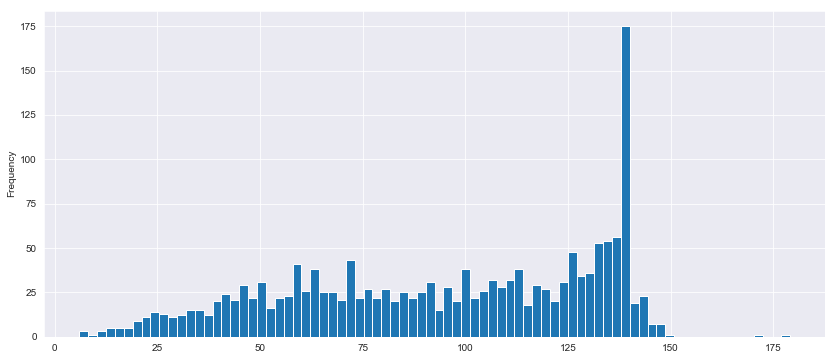

In [7]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
sample_anger['length'].plot(bins=80, kind='hist') 

In [12]:
# get most common words in training dataset
all_words = []
for line in list(sample_anger['Tweet']):
    words = line.split()
    
for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('the', 3),
 ('with', 2),
 ('@mariankeyes', 1),
 ('pout', 1),
 ('tips', 1),
 ('me', 1),
 ('over', 1),
 ('edge.', 1),
 ('i', 1),
 ('am', 1)]

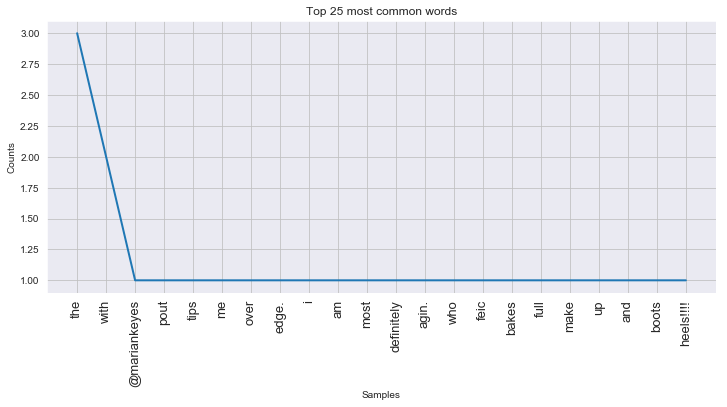

Text(0.5, 1.0, 'log-log plot of words frequency')

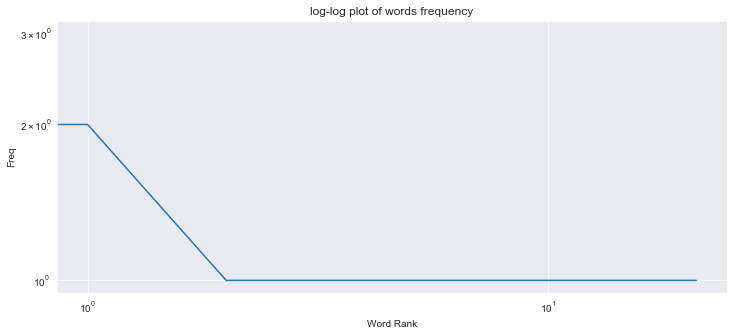

In [13]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [34]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove chines words
    tweet = re.sub(r'˜¥\w*','', tweet)
    tweet = re.sub(r'˜€\w*','', tweet)
    tweet = re.sub(r'˜¤\w*','', tweet)
    tweet = re.sub(r'˜ªðÿ\w*','', tweet)
    tweet = re.sub(r'ðÿ™\w*','', tweet)
    tweet = re.sub(r'\\\w*','', tweet)
    tweet = re.sub(r'±\w*','', tweet)
    tweet = re.sub(r'\w*','', tweet)
    tweet = re.sub(r'™„˜­\w*','', tweet)
    tweet = re.sub(r'ðÿ§€\w*','', tweet)
    tweet = re.sub(r'‘šðÿ¼\w*','', tweet)
    tweet = re.sub(r'ðÿ•\w*','', tweet)
    tweet = re.sub(r'€¢\w*','', tweet)
    tweet = re.sub(r'ã©\w*','', tweet)
    
    tweet = re.sub(r'\w*','',tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

# clean dataframe's text column
sample_anger['Tweet'] = sample_anger['Tweet'].apply(processTweet)
# preview some cleaned tweets
sample_anger['Tweet'].head(1000)

0                                 shut hashtags are cool 
1       makes fucking irate jesus nobody calling ppl w...
2                lol adam the bull with his fake outrage 
3       passed away early this morning fast and furiou...
4       lol wow was gonna say really haha have you see...
5                  need date olive guarded date and date 
6       and republicans you namely graham flake sasse ...
7       rabid dog pulled out the backs cupboards looki...
8       very telling that racist bigots always resort ...
9                                  follow follow through 
10                               dude the new madden haha
11      can come mum 60th after 25k tweets then why sh...
12                lol little things like that make angry 
13                        one more day tiff one more day 
14      being dean really saving lot ppl don snap nomo...
15      who knew softballs could sting bad jimmy fallo...
16      women don like girls because resent them for l...
17      where 

In [35]:
# drop duplicates
sample_anger= sample_anger.drop_duplicates('Tweet')
sample_anger.shape

(1400, 5)

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kushal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)

("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [38]:
sample_anger["Tweet"].head(1000)

0                                 shut hashtags are cool 
1       makes fucking irate jesus nobody calling ppl w...
2                lol adam the bull with his fake outrage 
3       passed away early this morning fast and furiou...
4       lol wow was gonna say really haha have you see...
5                  need date olive guarded date and date 
6       and republicans you namely graham flake sasse ...
7       rabid dog pulled out the backs cupboards looki...
8       very telling that racist bigots always resort ...
9                                  follow follow through 
10                               dude the new madden haha
11      can come mum 60th after 25k tweets then why sh...
12                lol little things like that make angry 
13                        one more day tiff one more day 
14      being dean really saving lot ppl don snap nomo...
15      who knew softballs could sting bad jimmy fallo...
16      women don like girls because resent them for l...
17      where 

In [39]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]




# -------------------------------------------

# tokenize message column and create a column for tokens
sample_anger = sample_anger.copy()
sample_anger['tokens'] = sample_anger['Tweet'].apply(text_process) # tokenize style


sample_anger.head()

,ID,Tweet,Affect Dimension,Intensity Score,length,tokens
0,2017-En-10264,shut hashtags are cool,anger,0.562,59,"[shut, hashtags, cool]"
1,2017-En-10072,makes fucking irate jesus nobody calling ppl w...,anger,0.750,109,"[makes, fucking, irate, jesus, nobody, calling..."
2,2017-En-11383,lol adam the bull with his fake outrage,anger,0.417,42,"[lol, adam, bull, fake, outrage]"
3,2017-En-11102,passed away early this morning fast and furiou...,anger,0.354,140,"[passed, away, early, morning, fast, furious, ..."
4,2017-En-11506,lol wow was gonna say really haha have you see...,anger,0.438,116,"[lol, wow, gonna, say, really, haha, seen, chr..."


In [40]:
from wordcloud import WordCloud

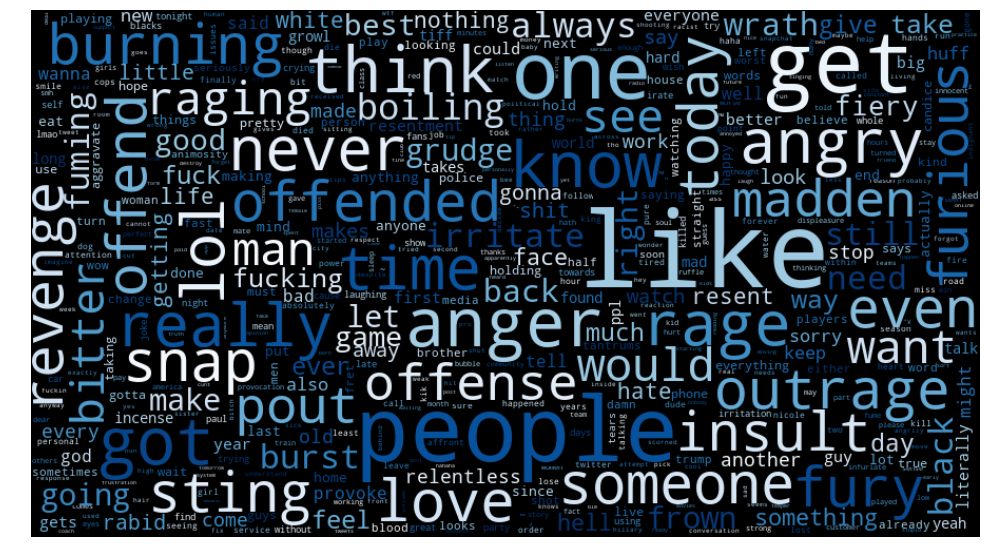

In [41]:
# split sentences to get individual words
all_words = []
for line in sample_anger['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
# vectorize
bow_transformer_uni = CountVectorizer(analyzer=text_process,lowercase=False, token_pattern=r'\S+', ngram_range=(1, 1)).fit(sample_anger['Tweet'])
bow_transformer_bi = CountVectorizer(analyzer=text_process,lowercase=False, token_pattern=r'\S+', ngram_range=(2, 2)).fit(sample_anger['Tweet'])
bow_transformer_uni_bi = CountVectorizer(analyzer=text_process,lowercase=False, token_pattern=r'\S+', ngram_range=(1, 2)).fit(sample_anger['Tweet'])
# print total number of vocab words
#print(len(bow_transformer.vocabulary_))
# output
#6865
# example of vectorized text
#sample_tweet = sample_anger['Tweet'][211]
#print(sample_tweet)
#print('\n')
# vector representation
#bow_sample = bow_transformer.transform([sample_tweet])
#print(bow_sample)
#print('\n')

In [43]:
#transform the entire DataFrame of messages
messages_bow_uni = bow_transformer_uni.transform(sample_anger['Tweet'])
messages_bow_bi = bow_transformer_bi.transform(sample_anger['Tweet'])
messages_bow_uni_bi = bow_transformer_uni_bi.transform(sample_anger['Tweet'])
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix of messages_bow_uni: ', messages_bow_uni.shape)
print('Amount of Non-Zero occurences in message_bow_uni: ', messages_bow_uni.nnz)



Shape of Sparse Matrix of messages_bow_uni:  (1400, 4222)
Amount of Non-Zero occurences in message_bow_uni:  10225


In [64]:
#Preparing training & test data (uni & bi-grams)
from sklearn.model_selection import train_test_split 
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(messages_bow_uni, sample_anger["Intensity Score"], test_size=0.33, random_state=42)
X_train_uni_bi, X_test_uni_bi, y_train_uni_bi, y_test_uni_bi = train_test_split(messages_bow_uni_bi, sample_anger["Intensity Score"], test_size=0.33, random_state=42)

In [82]:
pca = PCA(n_components=500)
X_train_uni_pca = pca.fit_transform(X_train_uni.toarray())
X_test_uni_pca = pca.transform(X_test_uni.toarray())



X_train_uni_bi_pca = pca.fit_transform(X_train_uni_bi.toarray())
X_test_uni_bi_pca = pca.transform(X_test_uni_bi.toarray())


In [83]:
def train_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train) # Train the model using the training sets
    y_pred = model.predict(X_test) # Make predictions using the testing set
    y_pred_train = model.predict(X_train)
    r2 = r2_score(y_test, y_pred)
    
    r2_train = r2_score(y_train, y_pred_train)
    rmse = mean_squared_error(y_test, y_pred)
    rmse_train = mean_squared_error(y_train, y_pred_train)
    print("Train: R2 : {0:f}, RMSE : {1:f}".format( r2_train, rmse_train ) )
    print("Test: R2 : {0:f}, RMSE : {1:f}".format( r2, rmse ) )
    return (rmse, r2)

alpha = 0.1
Train: R2 : 0.995350, RMSE : 0.000127
Test: R2 : 0.038799, RMSE : 0.025717
Train: R2 : 0.707063, RMSE : 0.007977
Test: R2 : 0.234224, RMSE : 0.020488
Train: R2 : 0.995350, RMSE : 0.000127
Test: R2 : 0.038799, RMSE : 0.025717
Train: R2 : 0.699590, RMSE : 0.008180
Test: R2 : 0.230103, RMSE : 0.020598
alpha = 0.8551724137931034
Train: R2 : 0.959159, RMSE : 0.001112
Test: R2 : 0.191832, RMSE : 0.021622
Train: R2 : 0.703071, RMSE : 0.008085
Test: R2 : 0.243237, RMSE : 0.020247
Train: R2 : 0.959159, RMSE : 0.001112
Test: R2 : 0.191832, RMSE : 0.021622
Train: R2 : 0.695706, RMSE : 0.008286
Test: R2 : 0.239452, RMSE : 0.020348
alpha = 1.610344827586207
Train: R2 : 0.921906, RMSE : 0.002126
Test: R2 : 0.229597, RMSE : 0.020612
Train: R2 : 0.695079, RMSE : 0.008303
Test: R2 : 0.248505, RMSE : 0.020106
Train: R2 : 0.921906, RMSE : 0.002126
Test: R2 : 0.229597, RMSE : 0.020612
Train: R2 : 0.687926, RMSE : 0.008498
Test: R2 : 0.245009, RMSE : 0.020200
alpha = 2.3655172413793104
Train: R

Train: R2 : 0.453438, RMSE : 0.014883
Test: R2 : 0.198904, RMSE : 0.021433
Train: R2 : 0.508643, RMSE : 0.013379
Test: R2 : 0.208182, RMSE : 0.021185
Train: R2 : 0.450467, RMSE : 0.014964
Test: R2 : 0.197748, RMSE : 0.021464
alpha = 22.0
Train: R2 : 0.500945, RMSE : 0.013589
Test: R2 : 0.205781, RMSE : 0.021249
Train: R2 : 0.447304, RMSE : 0.015050
Test: R2 : 0.196670, RMSE : 0.021493
Train: R2 : 0.500945, RMSE : 0.013589
Test: R2 : 0.205781, RMSE : 0.021249
Train: R2 : 0.444404, RMSE : 0.015129
Test: R2 : 0.195542, RMSE : 0.021523


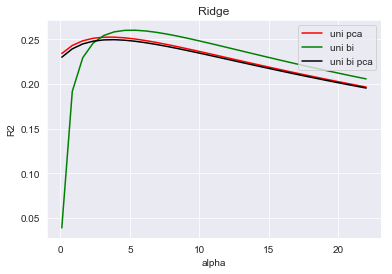

the best R^2 is 0.2603140839450464 with alpha=5.386206896551723 and training data: uni


In [86]:
r2_uni, r2_uni_pca, r2_uni_bi, r2_uni_bi_pca = [], [], [], []
max_r2, best_alpha, best_training_data = 0, 0, ''    
    
alphas = np.linspace(0.1,22,30)
for a in alphas:
    print('alpha = ' + str(a))
    # fit & evaluate uni-gram without pca
    model = linear_model.Ridge(alpha=a, random_state=seed)
    r2 = train_evaluate(model, X_train_uni, y_train_uni, X_test_uni, y_test_uni)[1]
    r2_uni.append(r2)
    if max_r2 < r2: max_r2, best_alpha, best_training_data = r2, a, 'uni'
    # fit & evaluate uni-gram with pca
    model = linear_model.Ridge(alpha=a, random_state=seed)
    r2 = train_evaluate(model, X_train_uni_pca, y_train_uni, X_test_uni_pca, y_test_uni)[1]
    r2_uni_pca.append(r2)
    if max_r2 < r2: max_r2, best_alpha, best_training_data = r2, a, 'uni with PCA'
    # fit & evaluate uni & bi-gram without pca
    model = linear_model.Ridge(alpha=a, random_state=seed)
    r2 = train_evaluate(model, X_train_uni_bi, y_train_uni_bi, X_test_uni_bi, y_test_uni_bi)[1]
    r2_uni_bi.append(r2)
    if max_r2 < r2: max_r2, best_alpha, best_training_data = r2, a, 'uni & bi'
    # fit & evaluate uni & bi-gram with pca
    model = linear_model.Ridge(alpha=a, random_state=seed)
    r2 = train_evaluate(model,X_train_uni_bi_pca, y_train_uni_bi, X_test_uni_bi_pca, y_test_uni_bi)[1]
    r2_uni_bi_pca.append(r2)
    if max_r2 < r2: max_r2, best_alpha, best_training_data = r2, a, 'uni & bi with PCA'

plt.plot(alphas,r2_uni_pca,'r', label='uni pca')
#plt.plot(alphas,r2_uni,'b', label='uni')
plt.plot(alphas,r2_uni_bi,'g', label='uni bi')
plt.plot(alphas,r2_uni_bi_pca,'k', label='uni bi pca')
plt.legend(loc='upper right', numpoints = 1)
plt.xlabel('alpha')
plt.ylabel('R2')
plt.title('Ridge')
plt.show()

#print the best C and training data
print('the best R^2 is ' + str(max_r2) + ' with alpha=' + str(best_alpha) + ' and training data: ' + best_training_data)


In [87]:
best_ridge_model = linear_model.Ridge(alpha=5.386206896551723, random_state=seed)
best_ridge_model.fit(X_train_uni, y_train_uni) # Train the model using the training sets
y_pred = best_ridge_model.predict(X_test_uni) # Make predictions using the testing set
pearson = pearsonr(y_test_uni, y_pred)
print('Pearson score for Ridge = ' + str(pearson[0]))

Pearson score for Ridge = 0.5110214972673197


l1_ratio = 0.1
l1_ratio = 0.2
l1_ratio = 0.30000000000000004
l1_ratio = 0.4
l1_ratio = 0.5


C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


l1_ratio = 0.6
l1_ratio = 0.7000000000000001
l1_ratio = 0.8


C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

l1_ratio = 0.9


C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

l1_ratio = 1.0


C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\kushal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

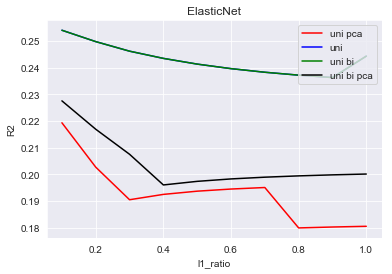

the best R^2 is 0.25399317924147335 with l1_ratio=0.1 and training data: uni


In [88]:
r2_uni, r2_uni_pca, r2_uni_bi, r2_uni_bi_pca = [], [], [], []
max_r2, best_l1_ratio, best_training_data = 0, 0, ''    
 
l1_ratios = np.linspace(0.1,1,10)
for l in l1_ratios:
    print('l1_ratio = ' + str(l))
    ENet = linear_model.ElasticNetCV(l1_ratio=l,eps=1e-6,cv=5,random_state=seed)
    # fit & evaluate uni-gram without pca
    ENet.fit(X_train_uni, y_train_uni)
    r2 = ENet.score(X_test_uni, y_test_uni)
    r2_uni.append(r2)
    if max_r2 < r2: max_r2, best_l1_ratio, best_training_data = r2, l, 'uni'
    # fit & evaluate uni-gram with pca
    ENet.fit(X_train_uni_pca, y_train_uni)
    r2 = ENet.score(X_test_uni_pca, y_test_uni)
    r2_uni_pca.append(r2)
    if max_r2 < r2: max_r2, best_l1_ratio, best_training_data = r2, l, 'uni with PCA'
    # fit & evaluate uni & bi-gram without pca
    ENet.fit(X_train_uni_bi, y_train_uni_bi)
    r2 = ENet.score(X_test_uni_bi, y_test_uni_bi)
    r2_uni_bi.append(r2)
    if max_r2 < r2: max_r2, best_l1_ratio, best_training_data = r2, l, 'uni & bi'
    # fit & evaluate uni & bi-gram with pca
    ENet.fit(X_train_uni_bi_pca, y_train_uni_bi)
    r2 = ENet.score(X_test_uni_bi_pca, y_test_uni_bi)
    r2_uni_bi_pca.append(r2)
    if max_r2 < r2: max_r2, best_l1_ratio, best_training_data = r2, l, 'uni & bi with PCA'

plt.plot(l1_ratios,r2_uni_pca,'r', label='uni pca')
plt.plot(l1_ratios,r2_uni,'b', label='uni')
plt.plot(l1_ratios,r2_uni_bi,'g', label='uni bi')
plt.plot(l1_ratios,r2_uni_bi_pca,'k', label='uni bi pca')
plt.legend(loc='upper right', numpoints = 1)
plt.xlabel('l1_ratio')
plt.ylabel('R2')
plt.title('ElasticNet')
plt.show()

#print the best l1_ratio and training data
print('the best R^2 is ' + str(max_r2) + ' with l1_ratio=' + str(best_l1_ratio) + ' and training data: ' + best_training_data)


In [91]:
best_Elastic_net_model = linear_model.ElasticNet('l1_ratio=0.1', random_state=seed)
best_ridge_model.fit(X_train_uni, y_train_uni) # Train the model using the training sets
y_pred = best_ridge_model.predict(X_test_uni) # Make predictions using the testing set
pearson = pearsonr(y_test_uni, y_pred)
print('Pearson score for Elastic_Net = ' + str(pearson[0]))

Pearson score for Elastic_Net = 0.5110214972673197


In [92]:
#Ensemble : Random Forest

depth: 1  estimators: 1000
Train: R2 : 0.052944, RMSE : 0.025788
Test: R2 : 0.055370, RMSE : 0.025273
Train: R2 : 0.052944, RMSE : 0.025788
Test: R2 : 0.055370, RMSE : 0.025273
Train: R2 : 0.065397, RMSE : 0.025449
Test: R2 : 0.033377, RMSE : 0.025862
Train: R2 : 0.066368, RMSE : 0.025422
Test: R2 : 0.033601, RMSE : 0.025856
depth: 2  estimators: 1000
Train: R2 : 0.089245, RMSE : 0.024799
Test: R2 : 0.080514, RMSE : 0.024601
Train: R2 : 0.089245, RMSE : 0.024799
Test: R2 : 0.080514, RMSE : 0.024601
Train: R2 : 0.144466, RMSE : 0.023296
Test: R2 : 0.061855, RMSE : 0.025100
Train: R2 : 0.145216, RMSE : 0.023275
Test: R2 : 0.062684, RMSE : 0.025078
depth: 3  estimators: 1000
Train: R2 : 0.120019, RMSE : 0.023962
Test: R2 : 0.097390, RMSE : 0.024149
Train: R2 : 0.120019, RMSE : 0.023962
Test: R2 : 0.097390, RMSE : 0.024149
Train: R2 : 0.240898, RMSE : 0.020670
Test: R2 : 0.085756, RMSE : 0.024460
Train: R2 : 0.241579, RMSE : 0.020651
Test: R2 : 0.087244, RMSE : 0.024420
depth: 4  estimator

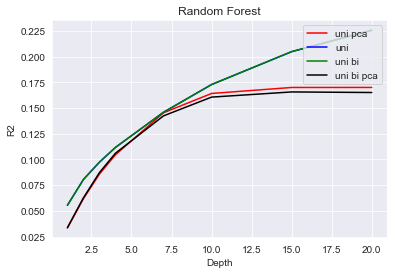

the best R^2 is 0.22571025267633593 with depth=20 and training data: uni


ValueError: cannot reshape array of size 8 into shape (8,3)

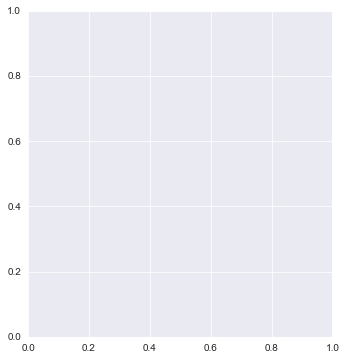

In [94]:
r2_uni, r2_uni_bi, r2_uni_pca, r2_uni_bi_pca = [], [], [], []
max_r2, best_depth, best_training_data = 0, 0, ''

depth = [1,2,3,4,7,10,15,20]
estimators = [10, 100, 1000]
for d in depth:
    #for e in estimators:
    print('depth: ' + str(d) + '  estimators: '+ str(1000))
    model = RandomForestRegressor(n_estimators=1000, max_depth=d, random_state=seed)
    r2_uni.append(train_evaluate(model, X_train_uni, y_train_uni, X_test_uni, y_test_uni)[1])
    if max_r2 < r2_uni[-1]: max_r2, best_depth, best_training_data = r2_uni[-1], d, 'uni'
    r2_uni_bi.append(train_evaluate(model, X_train_uni_bi, y_train_uni_bi, X_test_uni_bi, y_test_uni_bi)[1])
    if max_r2 < r2_uni_bi[-1]: max_r2, best_depth, best_training_data = r2_uni_bi[-1], d, 'uni & bi'
    r2_uni_pca.append(train_evaluate(model, X_train_uni_pca, y_train_uni, X_test_uni_pca, y_test_uni)[1])
    if max_r2 < r2_uni_pca[-1]: max_r2, best_depth, best_training_data = r2_uni_pca[-1], d, 'uni with PCA'
    r2_uni_bi_pca.append(train_evaluate(model, X_train_uni_bi_pca, y_train_uni_bi, X_test_uni_bi_pca, y_test_uni_bi)[1])
    if max_r2 < r2_uni_bi_pca[-1]: max_r2, best_depth, best_training_data = r2_uni_bi_pca[-1], d, 'uni & bi with PCA'

plt.plot(depth,r2_uni_pca,'r', label='uni pca')
plt.plot(depth,r2_uni,'b', label='uni')
plt.plot(depth,r2_uni_bi,'g', label='uni bi')
plt.plot(depth,r2_uni_bi_pca,'k', label='uni bi pca')
plt.legend(loc='upper right', numpoints = 1)
plt.xlabel('Depth')
plt.ylabel('R2')
plt.title('Random Forest')
plt.show()

print('the best R^2 is ' + str(max_r2) + ' with depth=' + str(best_depth) + ' and training data: ' + best_training_data)
        
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
data_r2_uni = pd.DataFrame(np.array(r2_uni).reshape(len(depth),len(estimators)), index=depth, columns=estimators)
ax = sns.heatmap(data_r2_uni, annot =True, fmt='.3g') #cmap="YlGnBu"
plt.title('R^2 uni')
plt.xlabel('# trees')
plt.ylabel('depth')
plt.subplot(1, 2, 2)
data_r2_uni_pca = pd.DataFrame(np.array(r2_uni_pca).reshape(len(depth),len(estimators)), index=depth, columns=estimators)
ax = sns.heatmap(data_r2_uni_pca, annot =True, fmt='.3g') #cmap="YlGnBu"
plt.title('R^2 uni pca')
plt.xlabel('# trees')
plt.ylabel('depth')
plt.tight_layout()
plt.show()

plt.subplot(1, 2, 1)
data_r2_uni_bi = pd.DataFrame(np.array(r2_uni_bi).reshape(len(depth),len(estimators)), index=depth, columns=estimators)
ax = sns.heatmap(data_r2_uni_bi, annot =True, fmt='.3g') #cmap="YlGnBu"
plt.title('R^2 uni & bi')
plt.xlabel('# trees')
plt.ylabel('depth')
plt.subplot(1, 2, 2)
data_r2_uni_bi_pca = pd.DataFrame(np.array(r2_uni_bi_pca).reshape(len(depth),len(estimators)), index=depth, columns=estimators)
ax = sns.heatmap(data_r2_uni_bi_pca, annot =True, fmt='.3g') #cmap="YlGnBu"
plt.title('R^2 uni & bi pca')
plt.xlabel('# trees')
plt.ylabel('depth')
plt.tight_layout()
plt.show()


In [96]:
best_RF_model = RandomForestRegressor(n_estimators=1000, max_depth=best_depth, random_state=seed)
best_RF_model.fit(X_train_uni, y_train_uni) # Train the model using the training sets
y_pred = best_RF_model.predict(X_test_uni) # Make predictions using the testing set
pearson = pearsonr(y_test_uni, y_pred)
print('Pearson score for Random Forest = ' + str(pearson[0]))

Pearson score for Random Forest = 0.49369000183175926
